### Data Clustering of Seeds Dataset

#### 2.1 Data Understanding for the seeds dataset
 
Initially, we must understand the data and its properties before feeding the dataset into the algorithm to identify if any data cleansing or preprocessing / transformation is required for the purposes of clustering. Note that the problem for this taks is an unsupervised learning problem, which implies that the data does not contain a class label. Initially we kick-start our assessment by imporing the relevant libraries and printing the necessary codes for data understanding purposes as follows:

In [697]:
# Importing libraries needed.
# Typical libraries for data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Libraries needed for training the clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import DBSCAN

# Libraries for additional functions and metrics:
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
import sys, importlib


# Needed for normalisation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [698]:
# load the data:
seed_dataset = pd.read_csv('seeds.csv')

# How many variables are present?
seed_dataset.head()


,area,perimeter,compactness,length,width,asymmetry,groove_length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


In [686]:
#Count the number of records

datarec = len(seed_dataset)
datarec

210

We can observe that the dataset size entail of 7 variables / attributes and 210 instances / rows. Similar to the previous taks, we should preform data understanding to understand the datatype and characteristicsof each attribute in the dataset as follows: 

In [687]:
print(seed_dataset.dtypes)

area             float64
perimeter        float64
compactness      float64
length           float64
width            float64
asymmetry        float64
groove_length    float64
dtype: object


In [688]:
seed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


We can observe that the datatype of each attribute is a float, and hence, this will not require any conversion to another datatype for the purpose of runing the clustering algorthm.

In [695]:
seed_dataset.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871000,5.628533,3.258605,3.700200,5.408071
std,2.909699,1.305959,0.023594,0.443063,0.377714,1.503559,0.491480
min,10.590000,12.410000,0.808000,4.899000,2.630000,0.765000,4.519000
25%,12.270000,13.450000,0.857250,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873500,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887750,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918000,6.675000,4.033000,8.456000,6.550000


We can also identify missing values and duplicates prior to running the clustering algorithm to make sure all datapoints are consistent and complete. Hence, we employ the same codes to check for duplicates and missing values as follows:

In [430]:
# Identify missing values
missing2 = seed_dataset.isnull()

# Count the number of missing values in each column
missing_count2 = missing2.sum()

# Display the missing values and their count
print(missing_count2)

area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
dtype: int64


In [431]:
#Checking for duplicates in the dataset

duplicates2 = seed_dataset[seed_dataset.duplicated()]

#Count for duplicates in the dataset

num_duplicates2 = duplicates2.count()

print(num_duplicates2)

area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
dtype: int64


As of the above checks, we understand that our data contains no missing values, is free of inconsistent datatype and does not cosist of any duplicated rows. At this stage, no data cleansing is required prior to moving towards applying the clustering algorithms required.

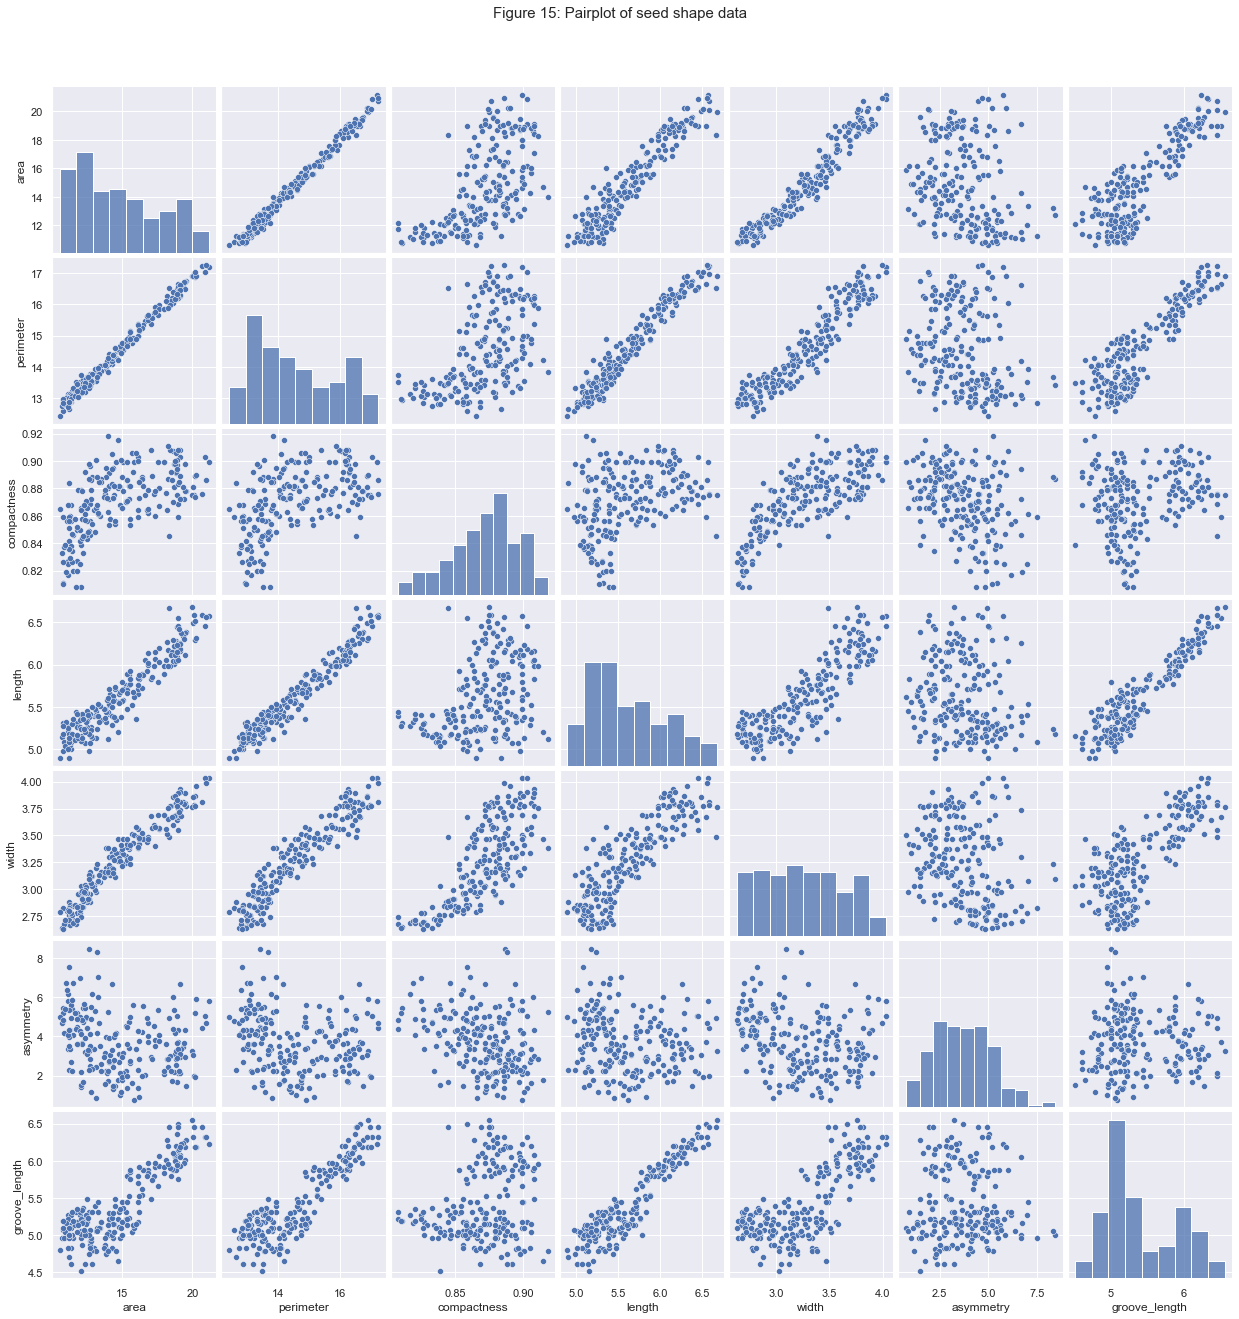

In [703]:
# Show the distribution of the variables?
sns.pairplot(seed_dataset);
plt.suptitle('Figure 15: Pairplot of seed shape data', fontsize=15, y=1.05);

Obserinvg the plots visually, we can identify that some plots form two clusters in the dataset at visual level, whereas other feature plots contain datapoints close to each forming a liniar regression shape. Looking at the distribution above, we can also observe that when plotting the "groove_lenth" with the rest of the attributes we produces two visable clusters. We can attempt to plot 'groove_length' with 'width' to demonstrate this more specifically as follows:

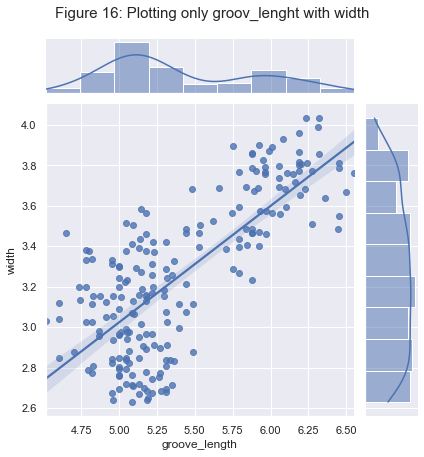

In [704]:
sns.jointplot(x='groove_length', y='width', data=seed_dataset, kind='reg');
plt.suptitle('Figure 16: Plotting only groov_lenght with width', fontsize=15, y=1.05);

#### 2.2 Data Preprocessing and Transformation

As one of the preprocessing steps is to standardize the features prior to running a clustering method, especially if the features have different scales or units. As the distance measures used by clustering algorithms would be based on the Euclidean distance between points, the algorithm would be sensitive to the scale of the features. Standardizing help enhance the accuracy and interpretability of the clustering model by eliminating the influence of the scale and ensures that all of the futures contribute equally to the distance calculations. To do this, we use the "StandardScaler()" function as follows: 

In [705]:
# selecting the features in the seeds dataset
sclr = seed_dataset.iloc[:, :7]

# standardize the features
scaler = StandardScaler()
sclr_std = scaler.fit_transform(sclr)


After standarizing the dataset, we may also consider reducing the dimensionality of the data given the provided dataset contains 7 features which is a high dimensional data which will render difficult to identify patterns and clusters. This will also help to take into account the most relevant features in a dataset and hence focus on the features that are most likely to be useful for identifying patterns and clusters and be computaionally tractable as well. Also reducing the data to 2 dimensions will faciliate the visualization of data and analysis. Hence, we use the PCA() function to preform the dimensionality reduction as follows:

In [706]:
# reduce the dimensions to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sclr_std)

In [707]:
X_pca

array([[ 3.17078025e-01,  7.83939502e-01],
       [-4.09296329e-03,  1.91167157e+00],
       [-4.58215994e-01,  1.90780004e+00],
       [-5.96876129e-01,  1.92038921e+00],
       [ 1.09926613e+00,  2.05981111e+00],
       [-3.37098561e-01,  1.63521878e+00],
       [-1.44120144e-01,  4.38751650e-01],
       [-4.25860603e-01,  1.38837096e+00],
       [ 1.77070959e+00,  3.14597661e-01],
       [ 1.44167372e+00,  1.01149854e+00],
       [ 7.17109942e-02, -4.20672166e-01],
       [-5.67526606e-01,  1.56790256e+00],
       [-9.30768092e-01,  8.74007466e-01],
       [-9.13419249e-01,  8.74417111e-01],
       [-1.01281789e+00,  9.49842256e-01],
       [-5.18089419e-01,  1.05200914e+00],
       [-7.86493437e-01,  1.13523525e+00],
       [ 6.82570771e-01,  2.17556279e+00],
       [-2.36350981e-01,  2.78185436e+00],
       [-1.73287741e+00,  3.49140606e-01],
       [-5.66532924e-01,  1.49740535e-01],
       [-4.79749905e-01,  7.00617810e-01],
       [ 8.60724118e-01,  2.32656819e+00],
       [-1.

In [708]:
seed_dataset_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

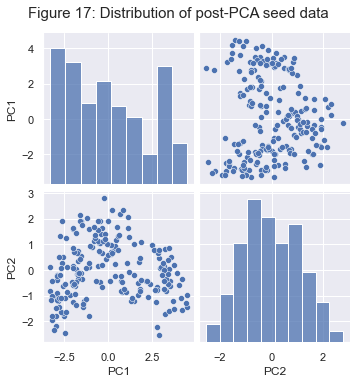

In [709]:
sns.pairplot(seed_dataset_pca);
plt.suptitle('Figure 17: Distribution of post-PCA seed data', fontsize=15, y=1.05);

After standarizing and scaling the data, we observe that our data currently has 2 dimensions as opposed 7. Standardization and PCA preprocessing methods do not undermine the data, but rather preserve as much of the variation in the data as possible, while reducing the dimensionality to a more manageable level. This can be useful in many situations, such as visualizing high-dimensional data. We may visualize the scaled and transformed data as follows:

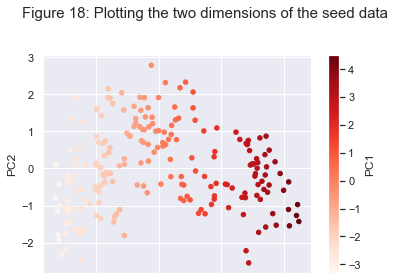

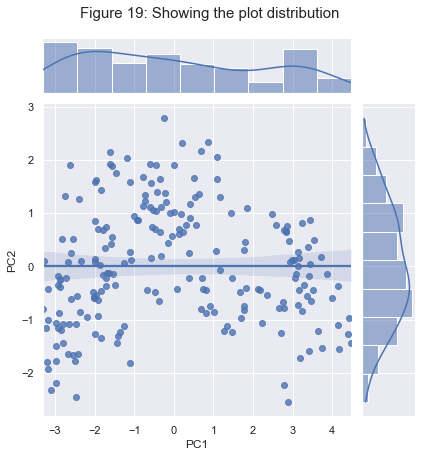

In [710]:
# create a scatterplot of the data
seed_dataset_pca.plot.scatter(x="PC1", y="PC2", c="PC1", cmap="Reds")
plt.suptitle('Figure 18: Plotting the two dimensions of the seed data', fontsize=15, y=1.05);

sns.jointplot(x='PC1', y='PC2', data=seed_dataset_pca, kind='reg');

plt.suptitle('Figure 19: Showing the plot distribution', fontsize=15, y=1.05);

As per figure 18 and 19, we can visually recognize that the post-PCA data has only two dimensions that take the most relevant patterns and features of the seed data. We may also recognize some aggregated datapoints that look a cluster up to 3 to 4 cluster centroids. 

#### 2.3 Constructing and comparing clustering algorithms

In subsection and after scaling and transforming the data, we will explore two clustering models, namely Gaussian Mixture Models (GMM) and K-Means that are used to partition data into groups (or clusters) based on their similarities. GMM is a probabilistic model that assumes that the data is generated from a mixture of a finite number of Gaussian distributions with unknown parameters whereas K-Means is a centroid-based algorithm that tries to partition the data into k clusters such that the sum of distances between the data points and their nearest cluster center (centroid) is minimized. To construct the model we start by defining the clusters and the models for GMM and K-means as follows:

In [712]:
# Defining and training the models:

# Defining the clusters to analyse
cn = 2

# Creating the definition of the models for both K-means and GMM
km_seed_dataset_pca = KMeans(n_clusters=cn, n_init=20, random_state=300)
gmm_seed_dataset_pca = GMM(n_components=cn, n_init=20, random_state=300)

# Training the model to a particular dataset
km_seed_dataset_pca.fit(seed_dataset_pca[['PC1', 'PC2']])
gmm_seed_dataset_pca.fit(seed_dataset_pca[['PC1', 'PC2']])

# Predicting the "labels" with the model defined and trained before
y_km_seed_dataset_pca = km_seed_dataset_pca.predict(seed_dataset_pca[['PC1', 'PC2']])
y_gmm_seed_dataset_pca = gmm_seed_dataset_pca.predict(seed_dataset_pca[['PC1', 'PC2']])

2


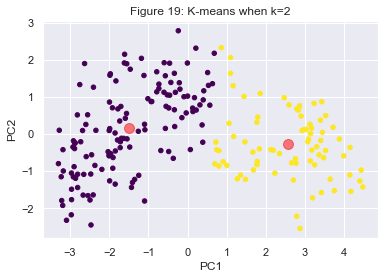

In [714]:
# Create a simple plot of the k-means result, with centers

plt.scatter(x='PC1', y='PC2', data=seed_dataset_pca,
            c=y_km_seed_dataset_pca, s=20, cmap='viridis')
centers = km_seed_dataset_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Figure 19: K-means when k=2')
print(len(centers))

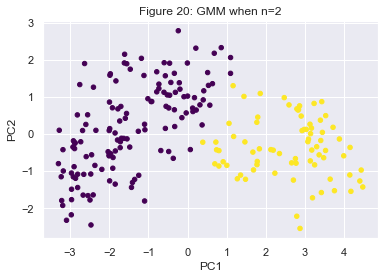

In [715]:
#Create a simple plot of the GMM result

plt.scatter(x='PC1', y='PC2', data=seed_dataset_pca,
            c=y_gmm_seed_dataset_pca, s=20, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Figure 20: GMM when n=2');


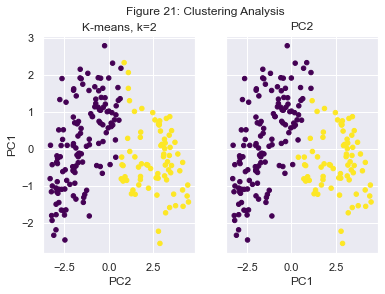

In [716]:
#Compare results of K-means and GMM
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Figure 21: Clustering Analysis')
ax1.scatter(x='PC1', y='PC2', data=seed_dataset_pca,
            c=y_km_seed_dataset_pca, s=20, cmap='viridis')
ax1.set_title('K-means, k=2')
ax1.set_ylabel('PC1')
ax1.set_xlabel('PC2')
ax2.scatter(x='PC1', y='PC2', data=seed_dataset_pca,
            c=y_gmm_seed_dataset_pca, s=20, cmap='viridis')
ax2.set_xlabel('PC1')
ax2.set_title('PC2');

As per Figure 19 and 20, we may deduce that the clusters created by GMM and K-means are almost identifical. We can also identify a handful of datapoints that are unmatched between the two models. This implies that both algorithms have been able to partition the data into similar groups. However, there might be some differences in the details of the clustering, such as the the membership of individual datapoints. We may also calculate the log-likelihood to measure the probability of the data given the model. This will enable us to observe how the log-likelihood changes as the number of clusters increases and provide insights into how well the model is fitting and how many clusters are needed to explain the structure of the data as follows:

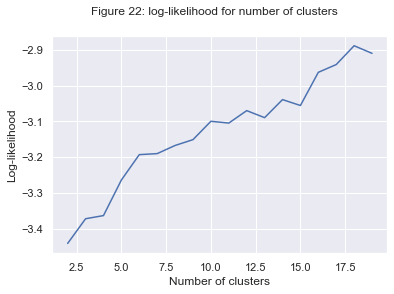

In [720]:
# create an empty list to store the log-likelihoods
log_likelihoods = []

# loop over a range of values for the number of clusters
for n_clusters in range(2, 20):
    # create an instance of the GaussianMixture class
    gmm = GMM(n_components=n_clusters)
    
    # fit the model to the data
    gmm.fit(seed_dataset_pca)
    
    # predict the probabilities of each point belonging to each cluster
    probs = gmm.predict_proba(seed_dataset_pca)
    
    # compute the log-likelihood of the data given the model
    log_likelihood = gmm.score(seed_dataset_pca)
    
    # append the log-likelihood to the list
    log_likelihoods.append(log_likelihood)

# plot the log-likelihoods
plt.plot(range(2, 20), log_likelihoods)
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.suptitle('Figure 22: log-likelihood for number of clusters')
plt.show()

We can see from Figure 22 that the log-likelihood increases as the number of clusters increases. This implies that adding more clusters is helping the model to fit the data better. This indicates that the data may have a complex structure that requires more clusters to be adequately modeled. We may also inspect the probabilistic cluster assignments and visualize the probabilities as follows:

In [726]:
# Inspect the probabilistic cluster assignments

probs = gmm.predict_proba(seed_dataset_pca)

probs.shape

(210, 19)

This implies that that the method has returned an array of shape (210, 19), where 210 is the number of samples (i.e., data points) in the dataset and 19 is the number of clusters in the GMM. We may aslo attempt to visualize the probabilities as follows: 

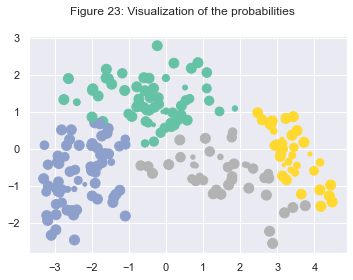

In [727]:
# Visualise the probabilities

X = seed_dataset_pca.values

psize = 100 * probs.max(axis=1)**3 

plt.scatter(X[:, 0], X[:, 1], c=y_gmm_seed_dataset_pca, cmap='Set2', s=psize)
plt.suptitle('Figure 23: Visualization of the probabilities')
plt.gca().set_aspect('equal')

Figure 23 outputs 4 clusters in the above probabilities visualization. This implies that that the GMM has identified 4 clusters in the data. For K-means, we may use the elbow method to extract the optimal number of clusters from the graph as follows: 

In [456]:
# Storing inertia into an empty list
elbm = []

# Range of the different values of K to analyse
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=300)
    km = km.fit(seed_dataset_pca)
    elbm.append(km.inertia_)
elbm

[498.0082251021065,
 270.49791181511955,
 211.49100324313665,
 167.66255080164888,
 143.36046200044808,
 119.80415311795458,
 104.29214588617494,
 92.61574432425192]

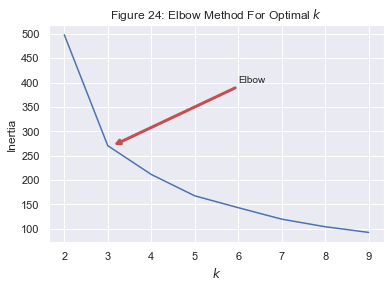

In [728]:
fig = plt.figure(figsize=(6,4))
plt.plot(K, elbm)
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.title('Figure 24: Elbow Method For Optimal $k$');
plt.annotate("Elbow", xy=(3.1, 270), xytext=(6, 400),
            arrowprops=dict(arrowstyle="->", color='r', linewidth=3));

As the optimal number of clusters is chosen at the "elbow" point, we can observe that this point is set at the performance of the clustering algorithm starts to decrease more slowly as the number of clusters increases which is at k=3. The performance of the k-means clustering algorithm is optimal when the number of clusters is 3, measured using the sum of squared distances between the points and their nearest cluster centers. 

Having this in mind, we may construct another K-means model by setting the number of clusters to the optimal number 3 and visualize the clustering results as follows:

3


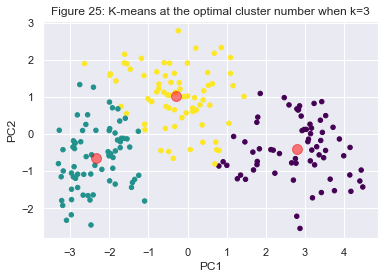

In [729]:
# Defining the clusters to analyse
cn2 = 3

# Creating the definition of the models for both K-means and GMM
km_seed_dataset_pca2 = KMeans(n_clusters=cn2, n_init=20, random_state=300)

# Training the model to a particular dataset
km_seed_dataset_pca2.fit(seed_dataset_pca[['PC1', 'PC2']])

# Predicting the "labels" with the model defined and trained before
y_km_seed_dataset_pca2 = km_seed_dataset_pca2.predict(seed_dataset_pca[['PC1', 'PC2']])

# Create a simple plot of the k-means result, with centers

plt.scatter(x='PC1', y='PC2', data=seed_dataset_pca,
            c=y_km_seed_dataset_pca2, s=20, cmap='viridis')
centers = km_seed_dataset_pca2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Figure 25: K-means at the optimal cluster number when k=3')
print(len(centers))

Next we may consider scoring our models using the Silhouette score. This measurement will enable us to understand how similar an object is to its own cluster compared to other clusters. It hence measures the separation of the clusters in our selected models by outputting a score from -1 to 1, where a higher value indicates better clustering. We use "silhouette_score()" function as follows: 

In [730]:
score_kmeans = silhouette_score(seed_dataset_pca, y_km_seed_dataset_pca)

print("Silhouette score: {:.3f}".format(score_kmeans))

Silhouette score: 0.439


The score above indicates that the clusters are not very well-separated and compact. The silhouette score ranges from -1 to 1, where a higher value indicates better clustering. A score of 0.439 is relatively low, and it suggests that the clusters are not very distinct or well-defined.

This may be the result of a number of reasons, such as the complexity of the data or the choice of k (the number of clusters). It is possible that the data contains patterns or structures that are not well-represented by the k-means algorithm, or that the number of clusters is not well-suited to the data. We may also visualize the outcome of the Silhouette score as follows: 

In [731]:
#Measure the silhouette score for the K-means clustering

S_C = []

# Run a for loop for the values of K to analyse

K = range(2, 20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(seed_dataset_pca)
    S_C.append(silhouette_score(seed_dataset_pca, kmeans.labels_))

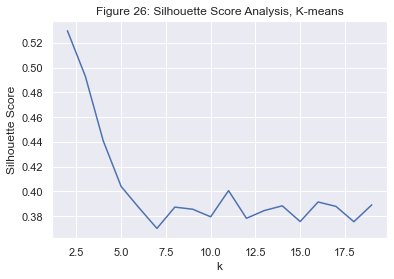

In [736]:
# plot the silhouette scores
plt.plot(K, S_C)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Figure 26: Silhouette Score Analysis, K-means');

For comparison, we also run Silhouette score for the GMM as follows:

In [741]:
score_gmm = silhouette_score(seed_dataset_pca, y_gmm_seed_dataset_pca)

print("Silhouette score: {:.3f}".format(score_gmm))

Silhouette score: 0.435


In [743]:
# Create an empty list to store silhouette scores
S_C2 = []

# loop over a range of values for the number of clusters
for n_clusters in range(2, 20):
    # create an instance of the GaussianMixture class
    gmm = GMM(n_components=n_clusters)
    gmm.fit(seed_dataset_pca)
    S_C2.append(silhouette_score(seed_dataset_pca, y_gmm_seed_dataset_pca))
    

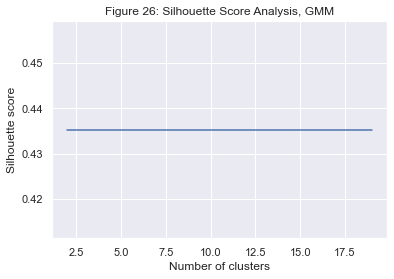

In [744]:
# plot the silhouette scores
plt.plot(range(2, 20), S_C2)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title('Figure 26: Silhouette Score Analysis, GMM');
plt.show()

Similarly, the Silhouette score for GMM is low reaching 0.435. Hence, it also indicates that the clusters are not very distinct or well-defined. As the output is a straight line, this means that the silhouette score has a constant value and is not changing as the number of clusters is varied. We can also preform the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) which will assist us to evaluate the quality of the GMM model. Doing so, The AIC and BIC penalize models with more parameters, as these models are more complex and may overfit the data. 

We run the following code to output the AIC and BIC results:

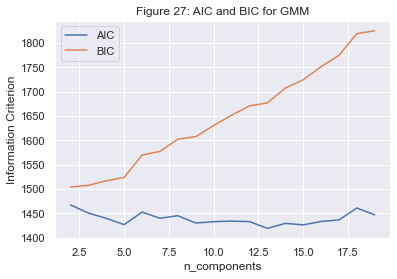

In [745]:
# Plot AIC and BIC values for the GMM.

n_components = range(2, 20)

models = [GMM(n, covariance_type='full', random_state=0).fit(seed_dataset_pca[['PC1', 'PC2']])
          for n in n_components]

plt.plot(n_components, [m.aic(seed_dataset_pca[['PC1', 'PC2']])
         for m in models], label='AIC')
plt.plot(n_components, [m.bic(seed_dataset_pca[['PC1', 'PC2']])
         for m in models], label='BIC')
plt.title('GMM')
plt.ylabel('Information Criterion')
plt.xlabel('n_components')
plt.title('Figure 27: AIC and BIC for GMM');
plt.legend();


Looking at Figure 27, we can recnogize that the GMM model elucidate that the AIC remains steady while the BIC keeps increasing with each number of component.This means that the AIC is not penalizing the model as much as the BIC for adding more components. This can occur if the model is overfitting the data and adding more components is not improving the fit of the model.

This is due to the properties of the AIC and BIC. The AIC is more lenient towards models with more parameters, as it does not penalize them as much as the BIC. In other words, the AIC may favor models that are more complex and overfit the data. On the other hand, the BIC is more conservative and penalizes models more heavily. This means that the BIC may favor simpler models that are less prone to overfitting.

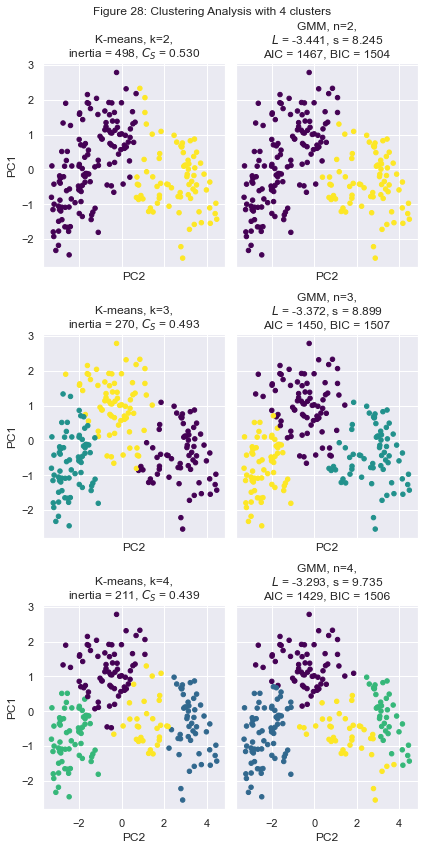

In [746]:
# Analysing both clustering algorithms with different numbers of clusters:

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(6, 12))
fig.suptitle('Figure 28: Clustering Analysis with 4 clusters')

# Defining the clusters to analyse
cn = np.arange(2, 5)

for n in cn:
    inst = n - cn[0]
    km_seed_dataset_pca = KMeans(n_clusters=n, n_init=20, random_state=300)
    gmm_seed_dataset_pca = GMM(n_components=n, n_init=20, random_state=300)

    km_seed_dataset_pca.fit(seed_dataset_pca[['PC1', 'PC2']])
    gmm_seed_dataset_pca.fit(seed_dataset_pca[['PC1', 'PC2']])

    y_km_seed_dataset_pca = km_seed_dataset_pca.predict(seed_dataset_pca[['PC1', 'PC2']])
    y_gmm_seed_dataset_pca = gmm_seed_dataset_pca.predict(seed_dataset_pca[['PC1', 'PC2']])

    ax[inst][0].scatter(x='PC1', y='PC2', data=seed_dataset_pca,
                        c=y_km_seed_dataset_pca, s=20, cmap='viridis')
    ax[inst][0].set_title(
        f'K-means, k={n},\n'
        f'inertia = {km_seed_dataset_pca.inertia_:.0f}, $C_S$ = {silhouette_score(seed_dataset_pca, km_seed_dataset_pca.labels_):.3f}')
    ax[inst][0].set_ylabel('PC1')
    ax[inst][0].set_xlabel('PC2')
    silhouette_score(seed_dataset_pca, km_seed_dataset_pca.labels_)
    ax[inst][1].scatter(x='PC1', y='PC2', data=seed_dataset_pca,
                        c=y_gmm_seed_dataset_pca, s=20, cmap='viridis')
    ax[inst][1].set_title(
        f'GMM, n={n},\n'
        f'$L$ = {gmm_seed_dataset_pca.score(seed_dataset_pca):.3f}, s = {np.exp(gmm_seed_dataset_pca.score_samples(seed_dataset_pca)).sum():.3f}'
        f'\nAIC = {gmm_seed_dataset_pca.aic(seed_dataset_pca):.0f}, BIC = {gmm_seed_dataset_pca.bic(seed_dataset_pca):.0f}')
    ax[inst][1].set_xlabel('PC2')


plt.tight_layout()

Looking at the plots, we can posit that the two algorithms cluster the data in different fasions and assigns members to different clusters. This becomes more prominent as the number of clusters increase to 3 and 4. This is due to the fact that the two algorithms have different properties, the K-means being a distance based algorithm and GMM being a probability-based algorithm.

GMM can fit a mixture of Gaussian distributions to the data. This makes it well-suited for data that is not necessarily uniformly distributed or has multiple modes. Hence, this will require less transoformation and preprocessing. Conversily, K-means, assumes that the data is uniformly distributed and has a spherical shape. It may not perform as well on data that does not meet these assumptions.

On a different perspective, GMM can fit a mixture of an arbitrary number of Gaussian distributions to the data, whereas K-means requires you to specify the number of clusters in advance. This means that GMM is more flexible but may be more exposed to overfitting if the number of clusters is not set appropriately. It can also fit clusters with arbitrary shapes, as long as they are approximately Gaussian. K-means can only fit clusters with a spherical shape.

While GMM is a more computationally intensive algorithm than K-means, our preference for the selected method is indeed the GMM as is more robust to distributions but also more flexible with data shapes.